/Users/ciaranohare/anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


[[ -11.12805789 -293.91477339  -69.33686403]]
PlotFuncs.py:313: RuntimeWarning: divide by zero encountered in log
  fv = log(fv)



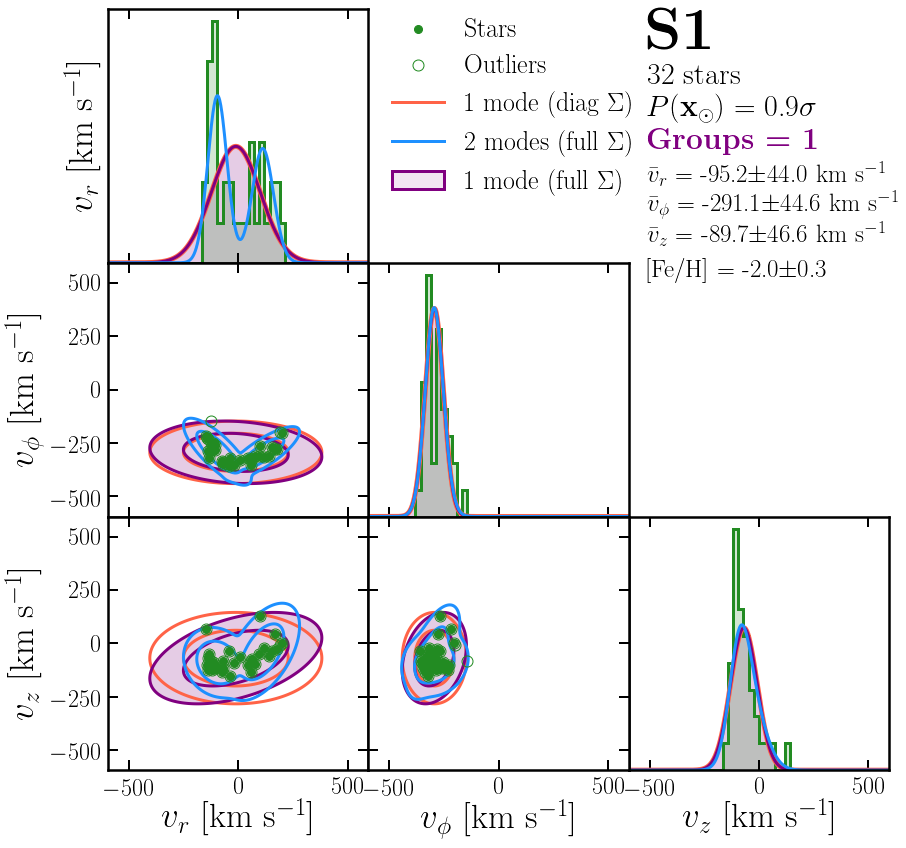

In [1]:
from numpy import *
from numpy.random import *
from PlotFuncs import *
import pandas

# Load all stars
df = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df.group_id.unique()
num_cands = size(names)

Cand = df.loc[df['group_id'] =='S1']
x_meens,x_covs,v_meens,v_covs,fehs,pops,Psun = FitStars(Cand,RemoveOutliers=True)
print v_meens
fig = VelocityTriangle(Cand,RemoveOutliers=True)
plt.show()

[[  24.85200333 -266.82848072 -171.84371652]
 [  44.46335587 -248.40908427  185.17671759]]


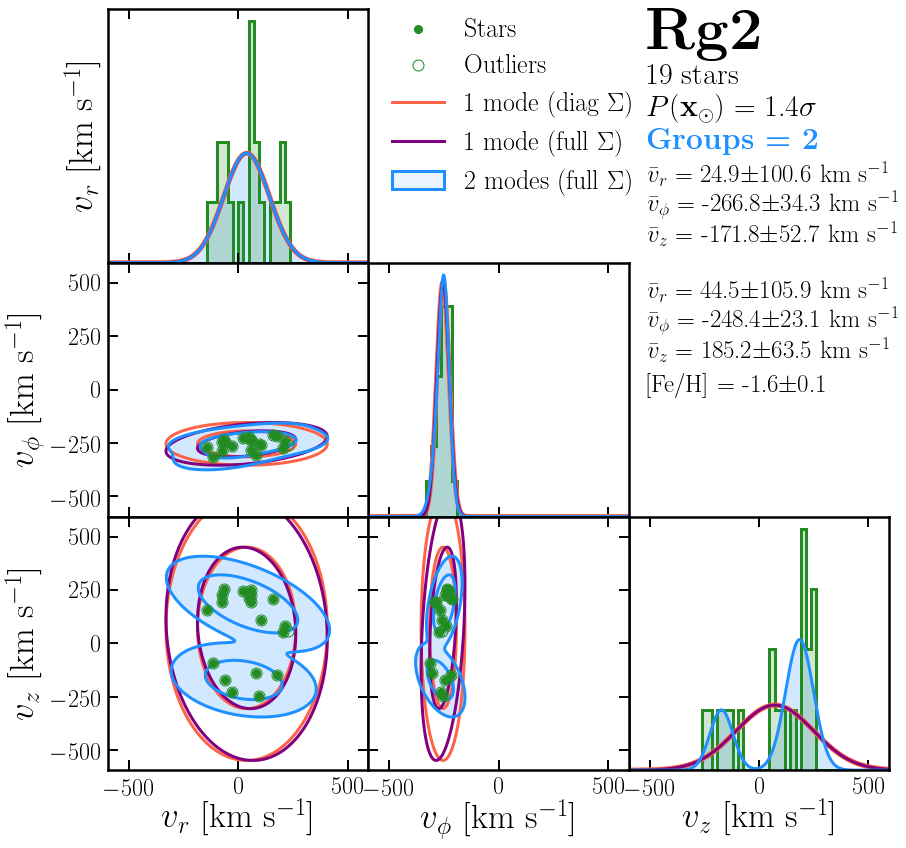

In [5]:
Cand = df.loc[df['group_id'] =='Rg2']
x_meens,x_covs,v_meens,v_covs,fehs,pops,Psun = FitStars(Cand,RemoveOutliers=True)
print v_meens
fig = VelocityTriangle(Cand,RemoveOutliers=True)
plt.show()

0.141724388841
0.123595686615


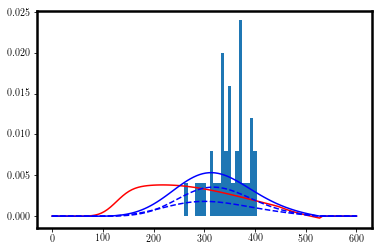

In [9]:
Cand = df.loc[df['group_id'] =='NCand2']

RemoveOutliers = True
z_th = 6.0

# Get data
name = Cand.group_id.unique()[0]
nstars = size(Cand,0)
feh = Cand.feh # metallicity
vx,vy,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel # velocities
x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ # positions
vv = sqrt(vx**2.0+vy**2.0+vz**2.0)


# Remove outliers if needed
data = array([x,y,z,vx,vy,vz,feh]).T
if RemoveOutliers and (nstars>15):
    mask = (abs(zscore(z))+abs(zscore(x))+abs(zscore(y)))<z_th
    data = data[mask,:]
    vv = vv[mask]
    nstars = size(vv)   

# Set up three models
clfa = mixture.GaussianMixture(n_components=1, covariance_type='diag',tol=1e-16)
clfb = mixture.GaussianMixture(n_components=1, covariance_type='full',tol=1e-16)
clfc = mixture.GaussianMixture(n_components=2, covariance_type='full',tol=1e-16)

# Fit data to each
clfa.fit(data)
clfb.fit(data)
clfc.fit(data)

v = linspace(0,600,100)

from HaloFuncs import *
meens_b = clfb.means_
covs_b =clfb.covariances_
vs = meens_b[0,3:6]
sig = sqrt(diagonal(covs_b[0,3:6,3:6]))
fv_b = SpeedDist_Triaxial(v,0,sig,v_shift=vs,GalFrame=True,SmoothCutoff=True)
plt.plot(v,fv_b,'r-')

meens_c = clfc.means_
covs_c =clfc.covariances_
w = clfc.weights_
vs0 = meens_c[0,3:6]
vs1 = meens_c[1,3:6]
sig0 = sqrt(diagonal(covs_c[0,3:6,3:6]))
sig1 = sqrt(diagonal(covs_c[1,3:6,3:6]))
fv_c1 = w[0]*SpeedDist_Triaxial(v,0,sig0,v_shift=vs0,GalFrame=True,SmoothCutoff=True)
fv_c2 = w[1]*SpeedDist_Triaxial(v,0,sig1,v_shift=vs1,GalFrame=True,SmoothCutoff=True) 

plt.plot(v,fv_c1+fv_c2,'b-')
plt.plot(v,fv_c1,'b--')
plt.plot(v,fv_c2,'b--')




fv,vbins = histogram(vv,bins=20,normed=True)
vc = (vbins[1:]+vbins[0:-1])/2.0

plt.hist(vv,bins=20,normed=True)

fvbO = SpeedDist_Triaxial(vc,0,sig,v_shift=vs,GalFrame=True,SmoothCutoff=True)
fvcO =  w[0]*SpeedDist_Triaxial(vc,0,sig0,v_shift=vs0,GalFrame=True,SmoothCutoff=True)\
        +w[1]*SpeedDist_Triaxial(vc,0,sig1,v_shift=vs1,GalFrame=True,SmoothCutoff=True) 
chi2_b = sum((fv-fvbO)**2.0/fvbO)
chi2_c = sum((fv-fvcO)**2.0/fvcO)

print chi2_b
print chi2_c

plt.show()

In [115]:
vv

array([[  1.10498676e+01,   4.67660636e+00,  -4.16613108e+00,
          3.35056331e+02,   8.38162867e+01,   5.25018441e+01,
         -1.51050500e+00],
       [  1.43245477e+01,   1.92703536e+00,   7.35351063e+00,
         -2.51041873e+02,   6.92927076e+01,   6.44574179e+00,
         -1.42448800e+00],
       [  1.23945454e+01,   4.81592300e-02,  -6.73258674e+00,
         -1.58170602e+02,   1.07289777e+02,   2.19768802e+02,
         -1.61333200e+00],
       [  7.07592466e+00,   6.44986710e-01,   2.60983999e+00,
         -2.82390206e+02,   1.76347948e+02,   2.04618868e+02,
         -2.09953800e+00],
       [  9.89323279e+00,  -1.22968750e-01,  -1.43124724e+00,
         -2.52234083e+02,   1.13806828e+02,   2.16934006e+02,
         -1.76917600e+00],
       [  1.24828990e+01,   3.00177397e+00,  -5.14445117e+00,
         -2.79233036e+02,   9.76661960e+01,  -3.83882694e+01,
         -1.54975200e+00],
       [  1.18647266e+01,  -5.20857700e+00,   7.69882624e+00,
          1.30257282e+02,   8.98

In [100]:
asarray(vv.tolist())

array([ 349.34847708,  260.50921085,  291.25137242,  390.78345442,
        351.61682246,  298.30091108,  282.27435205,  350.87421664,
        372.10292861,  373.08468946,  343.51321224,  326.46739287,
        349.35485137,  322.9238063 ,  390.2319443 ,  368.5153695 ,
        340.96956656,  315.47557231,  337.90659371,  314.85029514,
        371.18823866,  336.05374306,  360.07005392,  403.55905009,
        373.41632801,  377.03479197,  371.33375732,  332.43370994,
        363.22938897,  332.53352634,  361.44389237,  386.2821859 ,
        392.07315071,  402.82745863,  336.8601978 ])

In [18]:
sqrt(covs_c[0,3:6,3:6])

/Users/ciaranohare/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.



array([[  70.23190196,   20.43896835,           nan],
       [  20.43896835,   25.64059153,           nan],
       [          nan,           nan,  171.93295993]])

In [111]:
shape(data)

(35, 7)